# Week 5 (SVM, Tree-based Models)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR

- SVC (Classification)
- SVR (Regression)

## 1.1 Hard Margin Classifier

### Q1.1 Hard Margin Classifier란? :

Hard Margin Classifier는 모든 데이터 포인트가 결정 경계에서 오차 없이 정확히 분류되면서, 마진이 최대가 되도록 하는 것을 목표로 한다. 따라서 선형적으로 완벽하게 분리가 가능한 데이터셋에서만 사용 가능하다. 단, 이상치에 매우 민감하기에 이상치가 존재하면 모델 성능이 크게 저하될 가능성이 크다.

In [3]:
# 데이터셋 생성
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8]])
y = np.array([0, 0, 0, 1, 1, 1])

### Q1.2 위 데이터셋을 2차원의 좌표평면에 시각화해주세요.

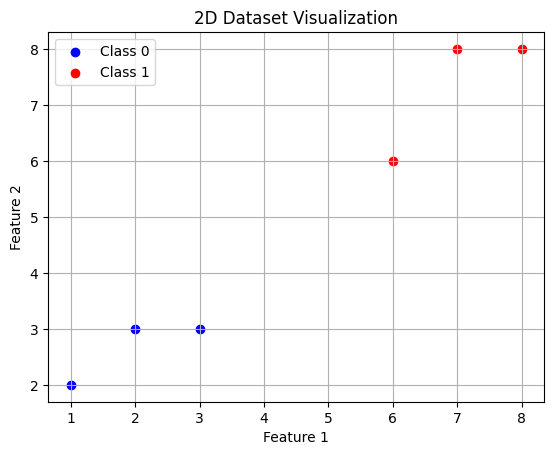

In [19]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'blue', label = 'Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'red', label = 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Dataset Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Hard Margin SVM 모델 학습
model = SVC(kernel='linear', C=1e10)  # linear 커널 사용 / C 값을 매우 크게 설정하여 Hard Margin SVM 구현
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### Q1.3 하단 w와 b는 모델 학습으로 찾아낸 Wx+b의 계수와 상수항입니다. w와 b를 정의해주세요.

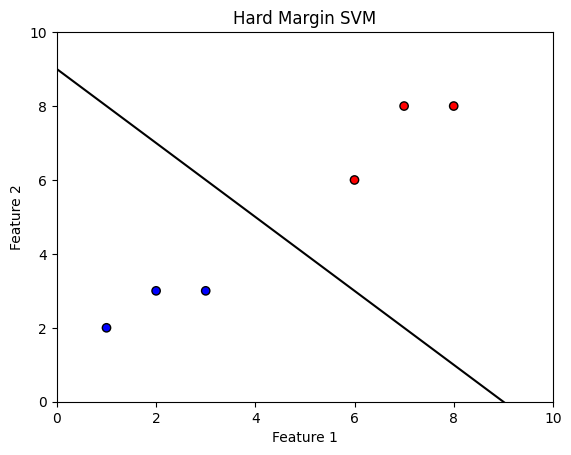

In [28]:
# 결정 경계 시각화
w = model.coef_[0]        # 가중치 벡터
b = model.intercept_[0]   # 절편
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]   # 결정 경계를 나타내는 식: w1*x + w2*y + b = 0
                                       # w[0]과 w[1]은 Feature x와 y 각각에 대한 가중치 -> SVM이 학습을 통해 최적화한 값
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM')
plt.show()

## 1.2 Soft Margin Classifier

### Q2.1 Soft Margin Classifier란?

Soft Margin Classifier는 선형 분리가 불가능한 데이터셋에서 분류 성능을 최적화하는 방법이다. 슬랙 변수를 도입함으로써 일부 데이터 포인트가 마진을 넘어가는 것이나 오류 발생을 허용하면서도 전체적으로 최적의 분류 경계를 찾으려는 접근 방식이다. 여기서 오류를 얼마나 허용할 것인지를 C 파라미터를 이용해 조정한다. (C가 클수록 오류를 적게 허용) 각 데이터 포인트에 대한 분류 오류를 슬랙 변수로 표현한다.

### Q2.2 Soft Margin의 정의를 떠올리며, 노이즈가 추가된 데이터셋을 생성해주세요. (2개 이상 추가 생성 필요)

In [35]:
# 데이터셋 생성 (약간의 노이즈 추가)
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8], [3, 6], [2, 5]])
y = np.array([0, 0, 0, 1, 1, 1, 0, 1])

In [36]:
# Soft Margin SVM 모델 학습
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

SVC(kernel='linear')

### Q2.3 마진을 산출해 시각화하고, Support Vector을 찾아주세요.

하단 그림은 예시로, 꼭 똑같이 출력되지 않아도 됩니다.

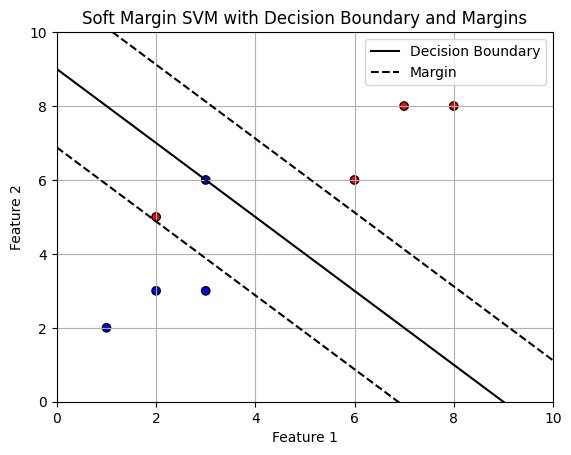

In [37]:
# 결정 경계 시각화
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# 마진 경계 계산
margin = 1 / np.sqrt(np.sum(w ** 2)) # 마진 = 1 / ||w|| 로 계산
y_margin_positive = y_plot + margin # '+1 마진 경계' : 결정 경계에서 +1 마진만큼 떨어진 경계
y_margin_negative = y_plot - margin # '-1 마진 경계' : 결정 경계에서 -1 마진만큼 떨어진 경계

# 마진 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary')
plt.plot(x_plot, y_margin_positive, 'k--', label='Margin')
plt.plot(x_plot, y_margin_negative, 'k--')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM with Decision Boundary and Margins')
plt.legend()
plt.grid(True)
plt.show()

# '서포트 벡터'는 결정 경계와 가장 가까운 데이터 포인트를 의미함

## 1.3 프로젝트 (SVC)

In [38]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

### **Linear SVC**

In [45]:
iris = load_iris()

X = iris.data[:, :2]
y = iris.target

C = 1
clf = SVC(kernel = "linear", C=C)
clf.fit(X,y)

SVC(C=1, kernel='linear')

In [46]:
y_pred = clf.predict(X) # 학습 데이터의 재예측 (실습용)
confusion_matrix(y, y_pred) # 따라서, 분류 결과가 상당히 정확할 수밖에 없음을 감안해야 함

# 클래스 0의 샘플 50개가 모두 올바르게 클래스 0으로 예측되었음.
# 클래스 1의 샘플 38개가 올바르게 클래스 1로 예측되었고, 12개는 클래스 2로 잘못 예측되었음.
# 클래스 2의 샘플 35개가 올바르게 클래스 2로 예측되었고, 15개는 클래스 1로 잘못 예측되었음.

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

### Q3.1 위 예시처럼, 옵션을 linear로 설정해도 되지만, sklearn의 LinearSVC 함수를 사용해도 구현할 수 있습니다. LinearSVC로 재구현해주세요.

In [47]:
# LinearSVC: kernel = 'linear' 옵션이 기본값이므로 C 값만 설정하면 됨 -> 선형 SVM 모델 학습
from sklearn.svm import LinearSVC

clf_1 = LinearSVC(C = C)
clf_1.fit(X, y)

y_pred_1 = clf_1.predict(X)
confusion_matrix(y, y_pred_1)

# 클래스 0의 샘플 49개가 올바르게 클래스 0으로 예측되었고, 1개는 클래스 1로 잘못 예측되었음.
# 클래스 1의 샘플 30개 올바르게 클래스 1로 예측되었고, 2개는 클래스 0으로, 18개는 클래스 2로 잘못 예측되었음.
# 클래스 2의 샘플 41개가 올바르게 클래스 2로 예측되었고, 9개는 클래스 1로 잘못 예측되었음.

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]])

### **Kernal SVC**

### Q3.2 Kernel SCV - non-linear한 형태의 SVM을 하나 이상 구현해주세요. 동일하게, 학습데이터를 predict하여 confusion matrix를 구해주세요.

In [48]:
# (1) RBF(Radial Basis Function) 커널 - kernel = 'rbf' 이용
clf_rbf = SVC(kernel = 'rbf', C = C)
clf_rbf.fit(X, y)

y_pred_rbf = clf_rbf.predict(X)
confusion_matrix(y, y_pred_rbf)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

In [49]:
# (2) 다항(Polynomial) 커널 - kernel = 'poly' 이용, degree = 3
clf_poly = SVC(kernel = 'poly', degree = 3, C = C)
clf_poly.fit(X, y)

y_pred_poly = clf_poly.predict(X)
confusion_matrix(y, y_pred_poly)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 16, 34]])

### 시각화

### Q3.3 아래 예시 plot처럼, linear model과 non-linear 모델의 시각화 결과를 출력해주세요.

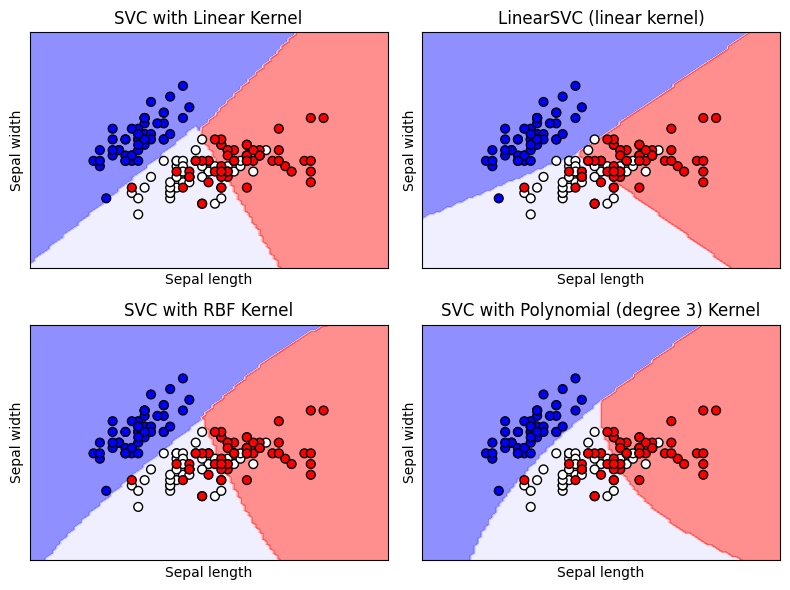

In [68]:
# 그리드 생성 (결정 경계 시각화용)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # 데이터포인트와 경계가 모두 잘 보이도록 약간의 여유를 두고 x축과 y축의 범위 설정
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  # xx와 yy는 100*100 크기의 2D 좌표 배열 그리드를 생성

# 예측값을 각 모델에 대해 계산
# xx.ravel()과 yy.ravel()은 2D 배열인 xx와 yy를 1D 배열로 변환
# np.c_[xx.ravel(), yy.ravel()]는 두개의 1D 배열을 열 기준으로 결합 -> 각 좌표 (x, y)를 한 행으로 가지는 (10000, 2) 형태의 2D 배열을 생성
# clf.predict(np.c_[xx.ravel(), yy.ravel()])는 입력된 2D 데이터 포인트 각각에 대해 클래스를 예측
# clf.predict의 결과는 (10000,) 크기의 1D 배열 -> .reshape(xx.shape)를 이용해 (100, 100)의 2D 배열 형태로 변환
Z_linear = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_linearSVC = clf_1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_poly = clf_poly.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 모델별로 결정 경계 시각화
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# 모델 1: SVC with linear kernel
axes[0, 0].contourf(xx, yy, Z_linear, alpha=0.5, cmap='bwr')  # contourf()는 등고선 그래프를 그리는 함수로, SVM의 결정 경계를 표현
                                                              # (x, y) 좌표에서 SVM이 예측한 클래스 값(Z_linear)에 따라 영역을 색으로 채운 그래프를 그림
axes[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=40)
axes[0, 0].set_title("SVC with Linear Kernel")
axes[0, 0].set_xlabel('Sepal length')
axes[0, 0].set_ylabel('Sepal width')
axes[0, 0].set_xticks([])  # x축 눈금 숨기기
axes[0, 0].set_yticks([])  # y축 눈금 숨기기

# 모델 2: LinearSVC (linear kernel)
axes[0, 1].contourf(xx, yy, Z_linearSVC, alpha=0.5, cmap='bwr')
axes[0, 1].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=40)
axes[0, 1].set_title("LinearSVC (linear kernel)")
axes[0, 1].set_xlabel('Sepal length')
axes[0, 1].set_ylabel('Sepal width')
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

# 모델 3: SVC with RBF kernel
axes[1, 0].contourf(xx, yy, Z_rbf, alpha=0.5, cmap='bwr')
axes[1, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=40)
axes[1, 0].set_title("SVC with RBF Kernel")
axes[1, 0].set_xlabel('Sepal length')
axes[1, 0].set_ylabel('Sepal width')
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

# 모델 4: SVC with Polynomial (degree 3) Kernel
axes[1, 1].contourf(xx, yy, Z_poly, alpha=0.5, cmap='bwr')
axes[1, 1].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=40)
axes[1, 1].set_title("SVC with Polynomial (degree 3) Kernel")
axes[1, 1].set_xlabel('Sepal length')
axes[1, 1].set_ylabel('Sepal width')
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

plt.tight_layout()
plt.show()

## 2.1. Decision Tree

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz                                                     # Decision Tree 등의 트리 구조를 시각화하는 데 사용
from sklearn.tree import DecisionTreeClassifier, export_graphviz    # export_graphviz: Decision Treen를 Graphviz 형식으로 변환하여 시각화가 가능하도록 함
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [71]:
# 데이터 로드 및 전처리
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 훈련/테스트 데이터 분할 - 8:2 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Q1.1 max_depth 파라미터를 변경하면 트리의 구조와 성능이 어떻게 변할까요?

max_depth는 결정 트리의 최대 깊이를 조절하는 파라미터이다. 만약 **max_depth가 3보다 커진다면**, 트리의 깊이가 깊어져 더 많은 규칙을 학습하게 된다. 이로 인해 훈련 데이터에 대해서는 성능이 매우 높아질 수 있지만, 과적합 발생 위험이 있다. 반대로 **max_depth를 작은 값으로 설정**한다면, 결정 트리의 가지 개수가 적어지고 단순한 구조의 트리로 변하게 된다. 이로 인해 훈련 데이터에 대한 학습 성능이 매우 낮아져 과소적합 발생 위험이 있으며, 반대로 과적합을 방지할 수 있다.

In [72]:
# 결정 트리 모델 생성 및 학습
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=2, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

### Q1.2 'gini'와 'entropy' 기준의 차이는 무엇이며, 결과에 어떤 영향을 미칠까요?

gini(지니 불순도)와 entropy(엔트로피)는 결정 트리의 불순도를 측정하는 방법이다. 두 값 모두 작을수록 노드가 더 순수함을 의미한다. gini는 계산이 비교적 간단하여 계산 속도가 빠른 반면, entropy는 더 복잡한 연산이 필요하다. gini는 가장 빈도수가 높은 클래스를 우선적으로 분리하려는 경향이 있고, entropy는 노드가 균등한 확률을 가지는 경우 분할을 더 신중하게 하여 균형 잡힌 분할을 시도한다. 따라서 gini를 기준으로 한다면 트리가 깊어질 가능성이 있고, entropy를 기준으로 한다면 트리가 더 균형 잡힐 가능성이 있지만 성능이 크게 차이가 나지 않을 수도 있다.

### Q1.3 각 노드의 분할 기준 어떻게 되는지 설명해보세요.

In [73]:
# 트리 시각화 (Graphviz)
dot_data = export_graphviz(
    tree_model,                         # 시각화할 결정 트리 모델
    out_file=None,                      # None -> 파일로 저장하지 않고 문자열로 반환
    feature_names=X.columns,            # 데이터셋의 피처의 이름을 트리에 표시
    class_names=iris.target_names,      # 클래스 이름을 트리에 표시
    filled=True,                        # 노드 색상을 클래스로 구분해 색칠
    rounded=True,                       # 노드 모서리를 둥글게 표시
    special_characters=True             # 특수문자를 지원
)                                       # -> dot_data 변수에는 트리 구조를 텍스트로 표현한 .dot 포맷의 문자열이 저장됨

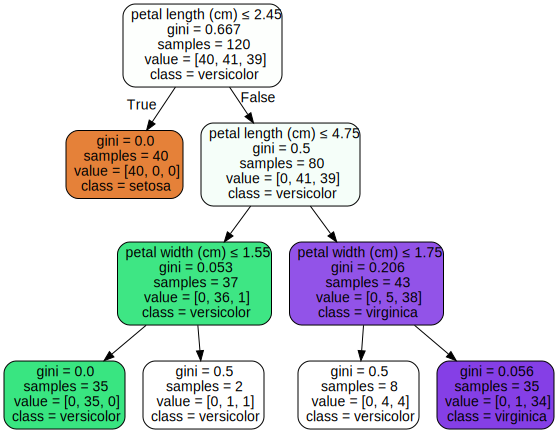

In [74]:
# 그래프 출력
graph = graphviz.Source(dot_data)
graph

**첫 번째 분할 기준: petal length(cm) <= 2.45** <br>
결과) True인 경우 setosa로 분류, 지니 불순도 = 0 / False인 경우의 노드 불순도 = 0.5로 versicolor인 샘플과 virginica인 샘플이 섞여있음. <br>
**두 번째 분할 기준: petal length(cm) <= 4.75** <br>
결과) True인 경우 지니 불순도는 0.053으로 완벽히 분류되지는 않음 / False인 경우 지니 불순도는 0.206으로 완벽히 분류되지 않음 <br>
**세 번째 분할 기준 (1) - 두 번째 분할 기준에서 True인 경우: petal width(cm) <= 1.55** <br>
결과) True인 경우 지니 불순도는 0으로 완벽히 versicolor로 분류됨 / False인 경우 지니 불순도는 0.5로 versicolor인 샘플 한 개와 virginica인 샘플 한 개 섞여있음 <br>
**세 번째 분할 기준 (2) - 두 번째 분할 기준에서 False인 경우: petal width(cm) <= 1.75** <br>
결과) True인 경우 지니 불순도는 0.5로 versicolor로 분류됨 / False인 경우 지니 불순도는 0.056로 virginica로 분류됨

## 3. 앙상블 학습: 부스팅(Boosting) 모델

Adaboost, Gradient Boosting Model은 scikit learn에서 지원하지만, LightGBM과 XGBoost의 경우는 외부 패키지를 불러와야 합니다.

Boosting 계열의 모델들은 데이터 개수가 적으면 overfitting이 일어나는 경우가 많으니, 주의해야 합니다.

In [75]:
# 필요한 패키지 로드
from sklearn.datasets import fetch_california_housing # 캘리포니아 주택 가격 데이터셋을 불러옴
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()

In [76]:
# 데이터 로드
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

In [77]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Q3.1 `housing_df`를 train, test split을 해봅시다.

분할 비율을 자유롭게 설정해봅시다.

In [78]:
# 데이터 분할 - 8:2로 분할
X = housing_df.drop(columns=['MedHouseVal'])
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

### Q3.2  데이터를 `RandomForestRegressor`에 적합해 봅시다.
train set 에 대해 `MedHouseVal`을 종속변수, 나머지를 독립변수로 하는 random forest regressor를 적합해 봅시다.

test set으로 prediction을 한 후 MSE를 구해 봅시다.

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse_rf}")

Mean Squared Error: 0.2553684927247781


### Q3.3 데이터를 `AdaBoostRegressor`에 적합해봅시다.

위와 동일

In [91]:
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.05, random_state = 42)
ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)

mse_ada = mean_squared_error(y_test, y_pred_ada)
print(f"Mean Squared Error: {mse_ada}")

Mean Squared Error: 0.5644120581403036


### Q3.4 데이터를 `GradientBoostingRegressor`에 적합해 봅시다.

위와 동일

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.1, max_depth = 3, random_state = 42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error: {mse_gb}")

Mean Squared Error: 0.25480300855947186


### Q3.5 데이터를 `lightgbm` 회귀에 적합해 봅시다.

파라미터를 자세히 살펴보고, 자유롭게 설정해 봅시다.

Documentation
https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

예시
https://www.geeksforgeeks.org/regression-using-lightgbm/


In [112]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(
    boosting_type = 'gbdt', objective = 'regression', n_estimators = 100, learning_rate = 0.1, max_depth = 10, random_state = 42
)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f"Mean Squared Error: {mse_lgb}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
Mean Squared Error: 0.2143942213823058


### Q3.6 데이터를 `xgboost`에 적합해 봅시다.

파라미터는 자유롭게 설정해 봅시다

In [110]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators = 100, learning_rate = 0.05, max_depth = 10, random_state = 42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error: {mse_xgb}")

Mean Squared Error: 0.22857585757453805


### Q3.7 `RandomForestRegressor`의 feature importance를 시각화해봅시다.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

위를 참고해보면서 Q2에서 적합한 random forest regressor의 feature importance를 시각화해 봅시다.

중요한 feature 부터 내림차순으로 시각화해 봅시다.

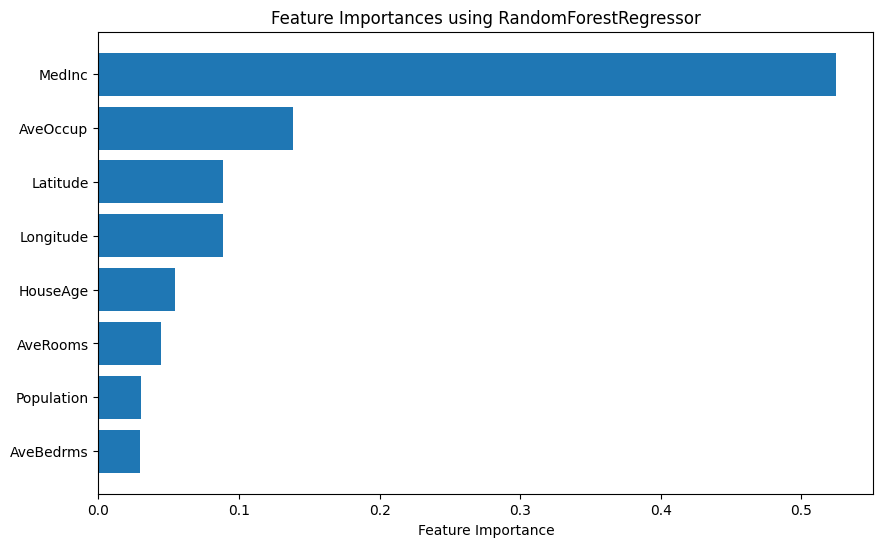

In [116]:
# Q2에서 적합한 RandomForestRegressor 모델 -> rf_model

feature_names = X.columns # feature names 가져오기
importances = rf_model.feature_importances_ # feature importance 가져오기
sorted_importances = np.argsort(importances)[::-1] # feature importance를 내림차순으로 정렬한 인덱스

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_importances], importances[sorted_importances])
plt.xlabel('Feature Importance')
plt.title('Feature Importances using RandomForestRegressor')
plt.gca().invert_yaxis()  # 중요한 feature부터 위에 표시
plt.show()

### (BONUS) 1. Boosting 모델 각각의 특징을 정리해보세요. 2. 모델 성능을 높이기 위하여 어떤 시도를 하면 좋을지 고민해

#### (1) AdaBoost(AdaBoostRegressor)
- 방식: 기본적인 회귀 모델을 기반으로, 각 모델이 잘못 예측한 데이터에 더 높은 가중치를 부여하며 순차적 학습
- 장점: 학습이 간단하고 빠름
- 단점: 노이즈나 이상치에 민감

#### (2) Gradient Boosting(GradientBoostingRegressor)
- 방식: 각 모델 학습 시, 이전 모델에서의 오차를 최소화하는 방향으로 학습. Loss Function의 기울기를 이용하여 학습
- 장점: 매우 강력한 성능. 과적합 방지를 위한 다양한 방법 제공
- 단점: 훈련 시간이 길고, 하이퍼파라미터 튜닝이 필요

#### (3) XGBoost(xgboost)
- 방식: Gradient Boosting 기반 + 여러 최적화 기법 추가(조기 종료, 정규화 등)
- 장점: 효율적이고 빠른 속도, 대규모 데이터셋에 강력함
- 단점: 많은 하이퍼파라미터

#### (4) LightGBM(lightgbm)
- 방식: XGBoost 기반 + Leaf-wise 방식 -> 더 빠르고 효율적인 알고리즘
- 장점: 대규모 및 고차원 데이터에 강력한 성능
- 단점: 작은 데이터셋에서는 과적합 발생 가능, 하이퍼파라미터 튜닝 필요

**모델 성능을 높이기 위해** <br>
1. 배깅, 부스팅 등의 앙상블 기법을 이용한 모델을 선택한다.
2. 하이퍼파라미터 튜닝을 통해 적절한 하이퍼파라미터를 선택하여 과적합 및 과소적합을 방지할 수 있다.
3. GridSearchCV를 이용해 하이퍼파라미터를 튜닝하고, KFold를 이용해 여러 번 모델을 훈련하고 검증하는 등의 방법처럼 교차 검증을 활용한다.
4. 라쏘, 릿지 등의 정규화를 활용하거나 하이퍼파라미터를 조정하여 모델 복잡도를 제어한다.